### Import

In [74]:
# Import bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from IPython.core.display import display, HTML
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import PolynomialFeatures
sns.set_style('darkgrid')
from scipy import stats

In [75]:
# Import danych
from sklearn.datasets import load_boston
boston_dataset = load_boston()
dataset = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

### Przygotowanie danych

Columns:

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [76]:
# Podgląd danych
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [77]:
# Dodanie kolumny "MEDV" którą staramy się przewidzieć
dataset['MEDV'] = boston_dataset.target

In [78]:
# Przegląd danych
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [79]:
# Sprawdzenie braków w danych
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [80]:
# Podział danych na treningowe i testowe
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

### Wizualizacja danych

<AxesSubplot:>

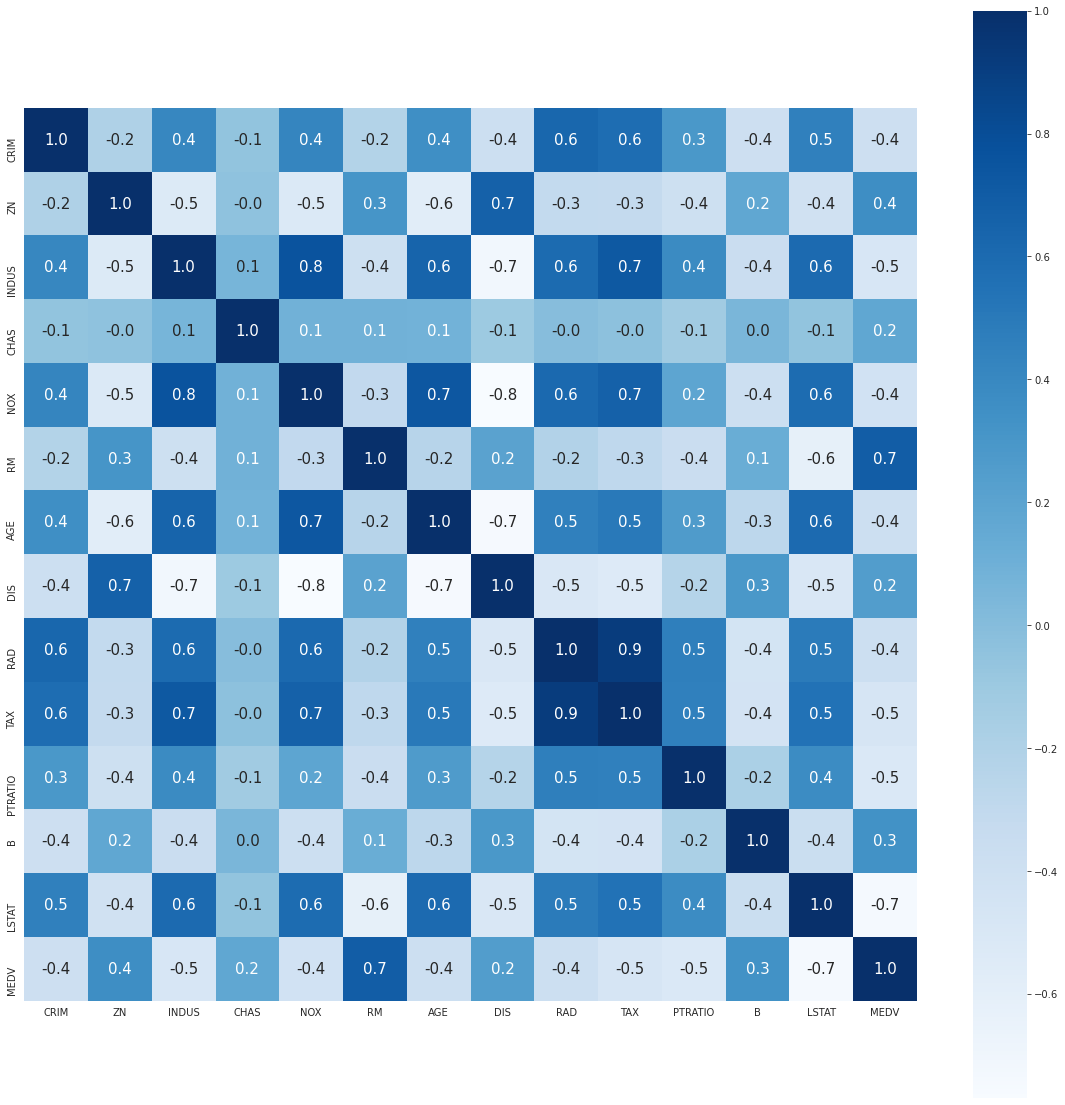

In [81]:
# Korelacja
corr = dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

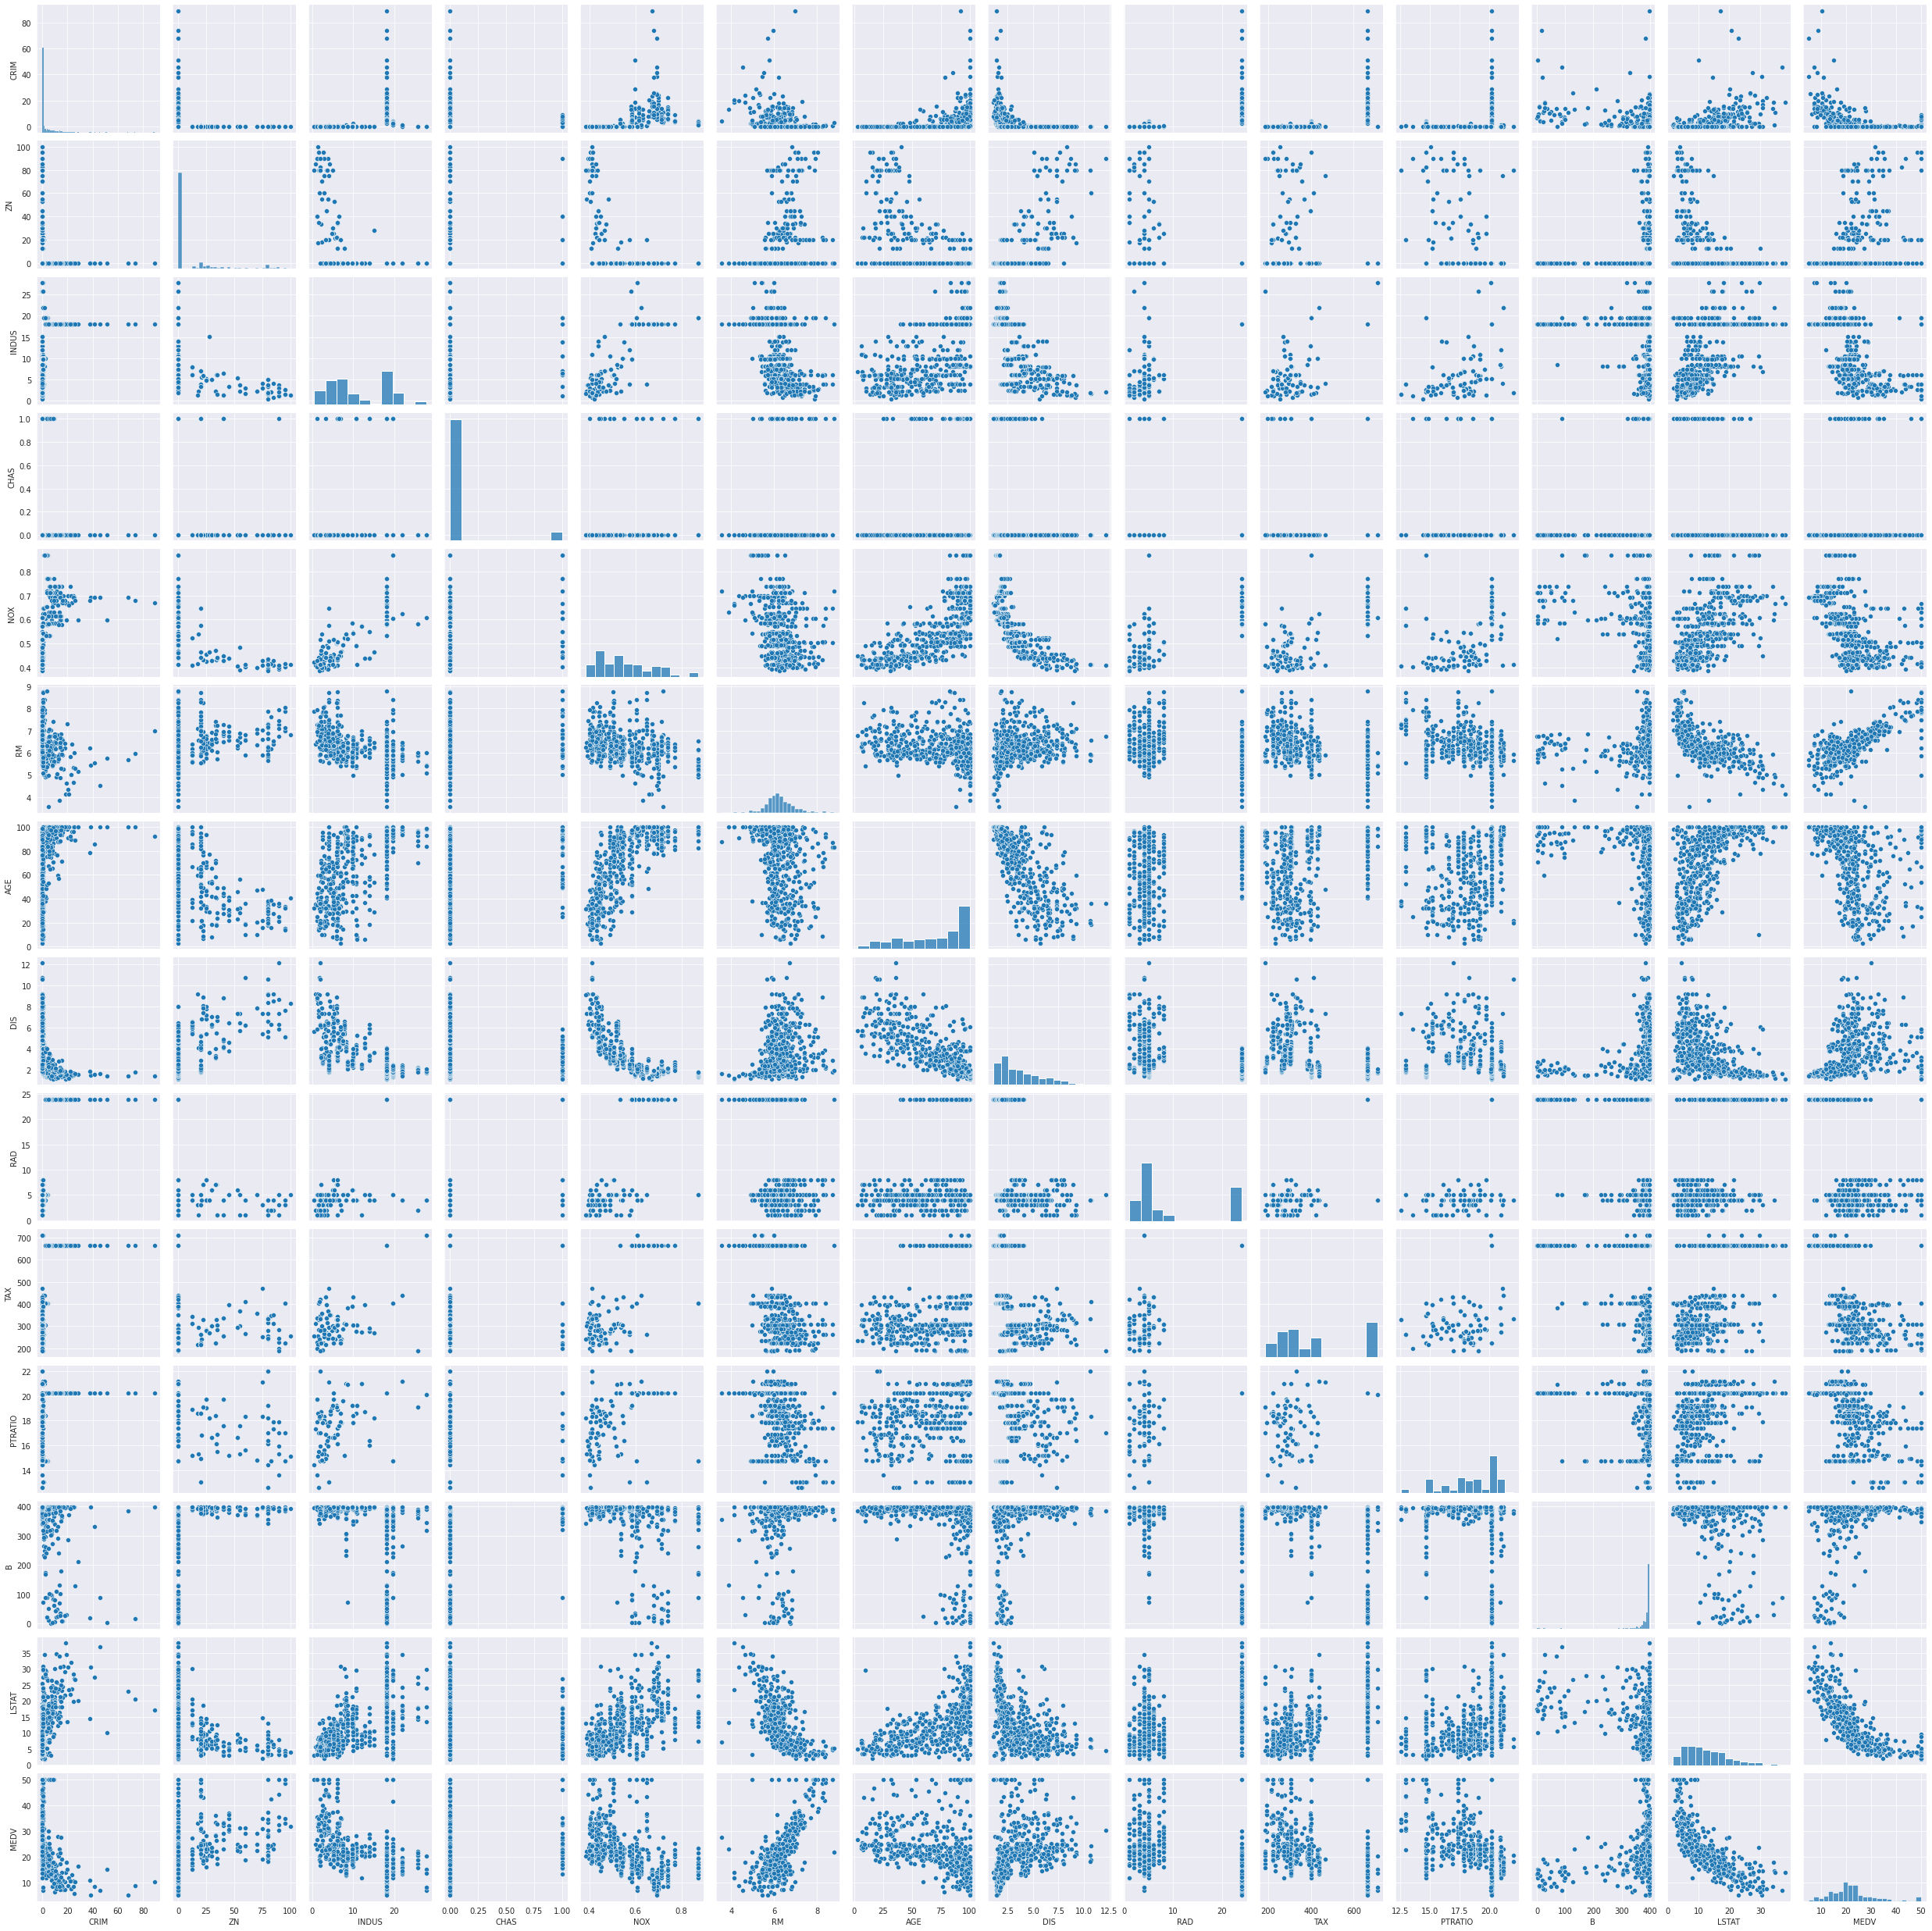

In [82]:
sns.pairplot(dataset)
plt.show()

### Regresja Liniowa

𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

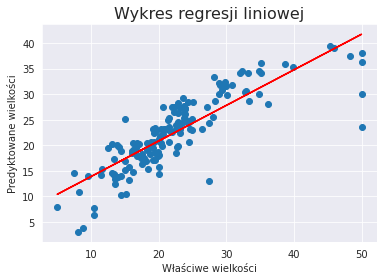

CV:  0.6984854476156042
R2_score (train):  0.7435787589010061
R2_score (test):  0.7133593313710349
RMSE:  4.647279745724213
MAE:  3.1175694194800947


In [83]:
# Regresja Liniowa
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

# Walidacja Krzyżowa
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)
# R2 dla danych treningowych
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)
# R2 dla danych testowych
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)
# Pierwiastek błędu średniokwadratowego
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
# Średni błąd bezwzględny
mae_linear= mae(y_test, y_pred_linear_test)

# Wykres
slope, intercept, r, p, std_err = stats.linregress(np.concatenate(y_test), np.concatenate(y_pred_linear_test))

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, y_test))

plt.scatter(y_test,y_pred_linear_test)
plt.plot(y_test, mymodel, color='red')
plt.title("Wykres regresji liniowej", fontsize=16)
plt.xlabel('Właściwe wielkości')
plt.ylabel('Predyktowane wielkości')
plt.show()

print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)
print("MAE: ", mae_linear)

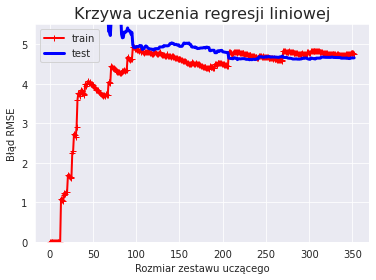

In [84]:
from sklearn.model_selection import learning_curve

def plot_learning_curves(model, X, y, ylim=None):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        train_errors, test_errors = [], []
        if ylim is not None:
            plt.ylim(*ylim)

train_errors = list()
test_errors = list()

for m in range(1, len(X_train)):
        regressor_linear.fit(X_train[:m], y_train[:m])
        y_train_predict = regressor_linear.predict(X_train[:m])
        y_test_predict = regressor_linear.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))

plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
plt.title("Krzywa uczenia regresji liniowej", fontsize=16)
plt.xlabel("Rozmiar zestawu uczącego")
plt.ylabel("Błąd RMSE")
plt.legend(loc="best")
plot_learning_curves(regressor_linear,X,y, ylim=(0, 5.5))
# Krzywa uczenia pokazana na ograniczonym odcinku w celu lepszej widoczności 

### Regresja wielomianowa - II stopnia

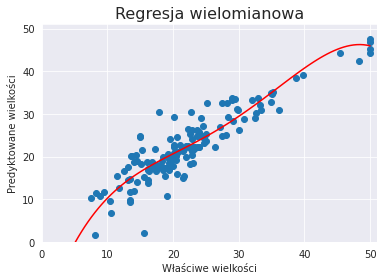

CV:  0.6984854476156042
R2_score (train):  0.9322525327409262
R2_score (test):  0.8194893868597699
RMSE:  3.687918224261934
MAE:  2.6635485506018877


In [85]:
# Regresja wielomianowa
poly_reg = PolynomialFeatures(degree = 2, include_bias=False)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

Y_pred = regressor_poly2.predict(X_poly)

# Walidacja Krzyżowa
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)
# R2 dla danych treningowych
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)
# R2 dla danych testowych
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)
# Pierwiastek błędu średniokwadratowego
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
# Średni błąd bezwzględny
mae_poly2= mae(y_test, y_pred_poly2_test)

# Wykres
mymodel = np.poly1d(np.polyfit(np.concatenate(y_test), np.concatenate(y_pred_poly2_test), 4))

myline = np.linspace(0, 50, 100)

plt.scatter(y_test, y_pred_poly2_test)
plt.xlim(0, 51)
plt.ylim(0, 51)
plt.plot(myline, mymodel(myline), color='red')
plt.title("Regresja wielomianowa", fontsize=16)
plt.xlabel('Właściwe wielkości')
plt.ylabel('Predyktowane wielkości')
plt.show()

print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)
print("MAE: ", mae_poly2)


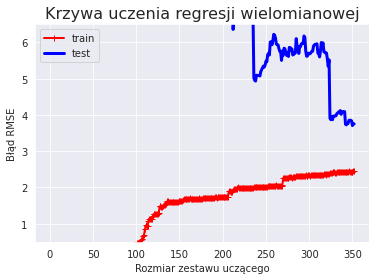

In [86]:
from sklearn.pipeline import Pipeline

from sklearn.model_selection import learning_curve

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias = False)),
    ("lin_reg",LinearRegression()),
    ])
polynomial_regression.fit(X_train, y_train)

train_errors1 = list()
test_errors1 = list()

for m in range(1, len(X_train)):
        polynomial_regression.fit(X_train[:m], y_train[:m])
        y_train_predict = polynomial_regression.predict(X_train[:m])
        y_test_predict = polynomial_regression.predict(X_test)
        train_errors1.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors1.append(mean_squared_error(y_test, y_test_predict))

plt.plot(np.sqrt(train_errors1), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(test_errors1), "b-", linewidth=3, label="test")
plt.title("Krzywa uczenia regresji wielomianowej", fontsize=16)
plt.xlabel("Rozmiar zestawu uczącego")
plt.ylabel("Błąd RMSE")
plt.legend(loc="best")

plot_learning_curves(polynomial_regression, X, y,ylim=(0.5, 6.5))
# Krzywa uczenia pokazana na ograniczonym odcinku w celu lepszej widoczności 